In [1]:
%matplotlib inline

In [2]:
from divtel import *
from tqdm.notebook import tqdm

## Load frame and configuration

In [3]:
cta = CTA_Info('north','2020-06-20T03:00')
array =  LoadConfig("../layout/layout-3AL4M15-5.txt", frame=cta)
array.divergent_pointing(0)
default_hFoV = array.hFoV().value

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T03:00:00.000


## Calculate the hFoV and multiplicity for a given (RA, DEC)

In [6]:
ra = np.linspace(0, 360, 13)
dec = np.linspace(-90, 90, 19)

In [ ]:
ra = np.linspace(0, 360, 13)
dec = np.linspace(-90, 90, 19)

test = []
for r in tqdm(ra):
    for d in tqdm(dec):
        try:
            array.set_pointing_coord(ra=r*u.deg, dec=d*u.deg)
            array.divergent_pointing(0.01)
            fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
            test.append([r, d, fov.value, m_ave])
        except:
            test.append([r, d, np.nan, np.nan])
test=np.asarray(test)

np.save("./output/test_a3h_0.01", test)

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

## Make a ratio plot (hFoV_divergent/hFoV_pointing)

In [4]:
filename = "./output/test_0h_0.01.npy"

Text(0, 0.5, 'DEC [Deg]')

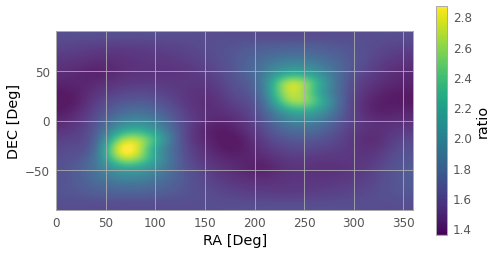

In [7]:
test = np.load(filename)

z = []
for d in dec:
    z.append(test[:,2][test[:,1]==d])

z = np.asarray(z[::-1])

extent = np.min(ra), np.max(ra), np.min(dec), np.max(dec)

img = plt.imshow(z/default_hFoV, cmap=plt.cm.viridis, alpha=.9, interpolation='spline36',
                 extent=extent)
plt.colorbar(img, anchor=(0, 0.3), shrink=0.7, label=r"ratio")
plt.xlabel("RA [Deg]")
plt.ylabel("DEC [Deg]")

## Make a multiplicity plot

Text(0, 0.5, 'DEC [Deg]')

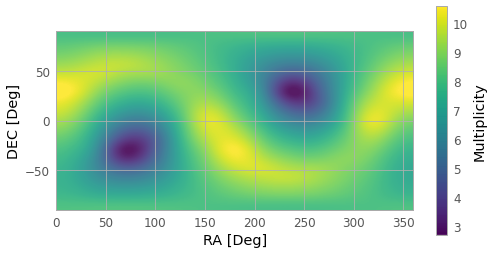

In [8]:
test = np.load(filename)

z = []
for d in dec:
    z.append(test[:,3][test[:,1]==d])

z = np.asarray(z[::-1])

extent = np.min(ra), np.max(ra), np.min(dec), np.max(dec)

img = plt.imshow(z, cmap=plt.cm.viridis, alpha=.9, interpolation='spline36',
                 extent=extent)
plt.colorbar(img, anchor=(0, 0.3), shrink=0.7, label=r"Multiplicity")
plt.xlabel("RA [Deg]")
plt.ylabel("DEC [Deg]")

## Dynamical choice of the div parameter

### Load results

In [9]:
div1 = np.load("./output/test_0h_0.01.npy")
div2 = np.load("./output/test_0h_0.02.npy")
div3 = np.load("./output/test_0h_0.03.npy")

### Select div based on a criterion (hFoV_ratio > 2)

In [10]:
z_h = []
idx = []
z_m = []
for d in dec:
    r1 = div1[:,2][div1[:,1]==d]
    r2 = div2[:,2][div2[:,1]==d]
    r3 = div3[:,2][div3[:,1]==d]
    m1 = div1[:,3][div1[:,1]==d]
    m2 = div2[:,3][div2[:,1]==d]
    m3 = div3[:,3][div3[:,1]==d]
    
    temp1 = []
    temp2 = []
    temp3 = []
    for a, b, c, d, e, f in zip(r1, r2, r3, m1, m2, m3):
        if a/default_hFoV > 2:
            temp1.append(a)
            temp2.append(0.01)
            temp3.append(d)
        elif b/default_hFoV > 2:
            temp1.append(b)
            temp2.append(0.02)
            temp3.append(e)
        else:
            temp1.append(c)
            temp2.append(0.03)
            temp3.append(f)
    z_h.append(temp1)
    idx.append(temp2)
    z_m.append(temp3)

z_h = np.asarray(z_h[::-1])
idx = np.asarray(idx[::-1])
z_m = np.asarray(z_m[::-1])

### Plot the results

Text(0, 0.5, 'DEC [Deg]')

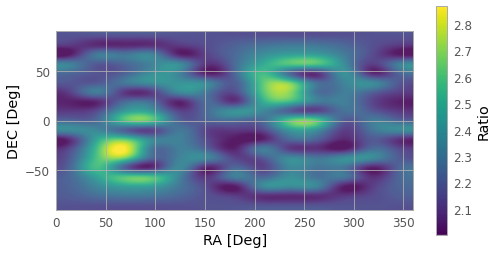

In [11]:
extent = np.min(ra), np.max(ra), np.min(dec), np.max(dec)

img = plt.imshow(z_h/default_hFoV, cmap=plt.cm.viridis, alpha=.9, interpolation='spline36',
                 extent=extent)
plt.colorbar(img, anchor=(0, 0.3), shrink=0.7, label=r"Ratio")
plt.xlabel("RA [Deg]")
plt.ylabel("DEC [Deg]")

Text(0, 0.5, 'DEC [Deg]')

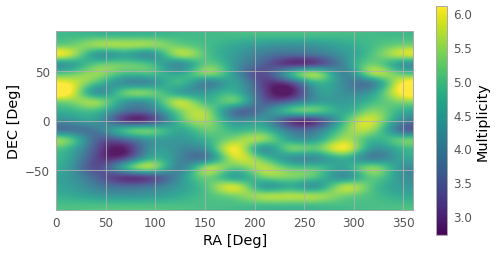

In [12]:
extent = np.min(ra), np.max(ra), np.min(dec), np.max(dec)

img = plt.imshow(z_m, cmap=plt.cm.viridis, alpha=.9, interpolation='spline36',
                 extent=extent)
plt.colorbar(img, anchor=(0, 0.3), shrink=0.7, label=r"Multiplicity")
plt.xlabel("RA [Deg]")
plt.ylabel("DEC [Deg]")

Text(0, 0.5, 'DEC [Deg]')

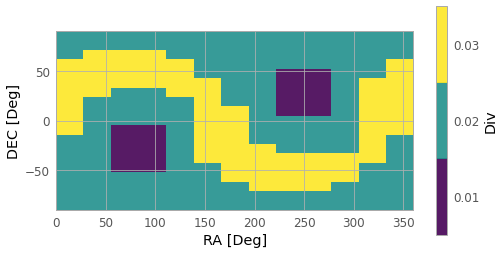

In [13]:
extent = np.min(ra), np.max(ra), np.min(dec), np.max(dec)

img = plt.imshow(idx, cmap=plt.cm.viridis, alpha=.9, 
                 extent=extent)
plt.colorbar(img, anchor=(0, 0.3), shrink=0.7, label=r"Div", ticks=[0.01, 0.02, 0.03], boundaries=[0.005, 0.015, 0.025, 0.035])
plt.xlabel("RA [Deg]")
plt.ylabel("DEC [Deg]")

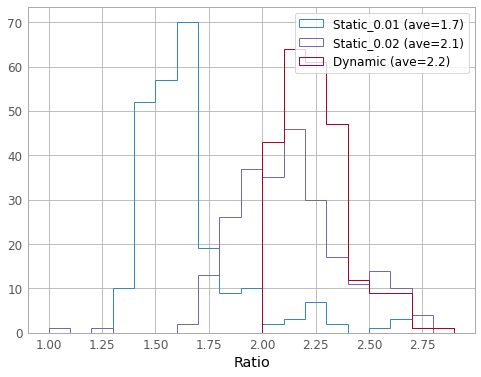

In [14]:
test = np.load("./output/test_0h_0.01.npy")

z = []
for d in dec:
    z.append(test[:,2][test[:,1]==d])

z1 = np.asarray(z[::-1])


test = np.load("./output/test_0h_0.02.npy")

z = []
for d in dec:
    z.append(test[:,2][test[:,1]==d])

z2 = np.asarray(z[::-1])


plt.hist(z1.flatten()/default_hFoV, np.arange(1, 3, step=0.1), label="Static_0.01 (ave={:.1f})".format(np.average(z1.flatten()/default_hFoV)), histtype="step")
plt.hist(z2.flatten()/default_hFoV, np.arange(1, 3, step=0.1), label="Static_0.02 (ave={:.1f})".format(np.average(z2.flatten()/default_hFoV)), histtype="step")
plt.hist(z_h.flatten()/default_hFoV, np.arange(1, 3, step=0.1), label="Dynamic (ave={:.1f})".format(np.average(z_h.flatten()/default_hFoV)), histtype="step")

plt.xlabel(r"Ratio")
plt.legend()